In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MARIGOLD as mg
import os
import openpyxl as op

%load_ext autoreload
%autoreload 2

In [2]:
author = 'talley'
refetch = True
xl_compare = True
multiplot = True

z_step = 0.01

preset = 'talley'
cd_method = 'doe'
void_method = 'driftflux'
C_inf = 1
debug = False

Talley's horizontal model uses:
- jg/vgz to calculate alpha
- Ishii Chawla to compute ur (no iteration)
- Contributions from VG, PD, TI, RC, WE
- DOE method for SEXP (SPD)
- Pre-calculates jg development based on pressure

Need to implement:
- OP_vel = 2: Talley horizontal DFM
- OP_press(?): horizontal LM? What we have right now might be sufficient
- OP_COV = 3: Void reconstruction COV model (MATLAB script has hard-coded COV values)

Definitely something wrong with pressure drop calculation

In [3]:
endpoints = [244]
modes = [None]

In [4]:
database = None

if author == 'talley':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\38.1mm_talley")
    # print(cwd)
    dat_to_fetch = 'database_t.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='talley_template', debug=True)

if database == None:
    database = mg.loadProbeData(dat_to_fetch)

In [5]:
# Unique flow condition finding, for plotting
cmap = []
lmap = []
for i, cond in enumerate(database):
    print(cond)
    cmap.append([cond.theta, cond.jf, cond.jgref])
    lmap.append(cond.LoverD)
cmap = np.array(cmap)
umap = np.unique(cmap,axis=0)
sp = np.min(lmap)

print(f"\nsp: {sp}")

jf=3.98_jgloc=0.09_theta=0.0_port=44D_Talley
jf=3.98_jgloc=0.10_theta=0.0_port=116D_Talley
jf=3.98_jgloc=0.11_theta=0.0_port=244D_Talley
jf=3.98_jgloc=0.16_theta=0.0_port=44D_Talley
jf=3.98_jgloc=0.17_theta=0.0_port=116D_Talley
jf=3.98_jgloc=0.19_theta=0.0_port=244D_Talley
jf=4.98_jgloc=0.08_theta=0.0_port=44D_Talley
jf=4.98_jgloc=0.09_theta=0.0_port=116D_Talley
jf=4.98_jgloc=0.10_theta=0.0_port=244D_Talley
jf=4.98_jgloc=0.13_theta=0.0_port=44D_Talley
jf=4.98_jgloc=0.14_theta=0.0_port=116D_Talley
jf=4.98_jgloc=0.17_theta=0.0_port=244D_Talley
jf=4.98_jgloc=0.26_theta=0.0_port=44D_Talley
jf=4.98_jgloc=0.28_theta=0.0_port=116D_Talley
jf=4.98_jgloc=0.33_theta=0.0_port=244D_Talley
jf=5.98_jgloc=0.07_theta=0.0_port=44D_Talley
jf=5.98_jgloc=0.07_theta=0.0_port=116D_Talley
jf=5.98_jgloc=0.09_theta=0.0_port=244D_Talley
jf=5.98_jgloc=0.11_theta=0.0_port=44D_Talley
jf=5.98_jgloc=0.12_theta=0.0_port=116D_Talley
jf=5.98_jgloc=0.15_theta=0.0_port=244D_Talley
jf=5.98_jgloc=0.22_theta=0.0_port=44D_Tal

jf=3.98_jgloc=0.09_theta=0.0_port=44D_Talley

u_t_avg: 0.43576979193535875	ai_avg: 93.02854722222223	alpha_avg: 0.03151916666666667	
COV_RC_num: 4853.838243500118	COV_RC_den: 7003.527470036137

We_avg: 5.292040296666525
COV_TI_num: 2647.285496804755	COV_TI_den: 10926.892558319263
COV_RC: 0.6930562154952286	COV_TI: 0.2422724926300503


jf=3.98_jgloc=0.10_theta=0.0_port=116D_Talley
jf=3.98_jgloc=0.11_theta=0.0_port=244D_Talley
jf=3.98_jgloc=0.16_theta=0.0_port=44D_Talley

u_t_avg: 0.4434027672084367	ai_avg: 116.44357777777778	alpha_avg: 0.04026283333333334	
COV_RC_num: 5984.119034563044	COV_RC_den: 11694.972765836807

We_avg: 5.5915988017751275
COV_TI_num: 2490.5049050622574	COV_TI_den: 19862.10425445242
COV_RC: 0.5116830243541712	COV_TI: 0.12538978112069718


jf=3.98_jgloc=0.17_theta=0.0_port=116D_Talley
jf=3.98_jgloc=0.19_theta=0.0_port=244D_Talley
jf=4.98_jgloc=0.08_theta=0.0_port=44D_Talley

u_t_avg: 0.4841321231519205	ai_avg: 95.93774722222221	alpha_avg: 0.024665138888888882	
COV_RC

\\helios.ecn.purdue.edu\kang284\trsl-h\python_modules\marigold\src\MARIGOLD\Condition.py:2940: RuntimeWarning: invalid value encountered in sqrt
  COV_TI_avg = (u_t_avg * ai_avg**2 / alpha_avg) * np.sqrt(1 - (We_cr / We_avg)) * np.exp(-We_cr / We_avg)



We_avg: 4.956467481704093
COV_TI_num: 10563.237886590505	COV_TI_den: nan
COV_RC: 3.2123305195750693	COV_TI: nan


jf=4.98_jgloc=0.09_theta=0.0_port=116D_Talley
jf=4.98_jgloc=0.10_theta=0.0_port=244D_Talley
jf=4.98_jgloc=0.13_theta=0.0_port=44D_Talley

u_t_avg: 0.4991604558927554	ai_avg: 141.6873861111111	alpha_avg: 0.03804255555555555	
COV_RC_num: 14235.925205166399	COV_RC_den: 19274.03443866545

We_avg: 5.502616585863163
COV_TI_num: 14449.605280577025	COV_TI_den: 32087.894588251027
COV_RC: 0.7386064007755351	COV_TI: 0.45031328686387995


jf=4.98_jgloc=0.14_theta=0.0_port=116D_Talley
jf=4.98_jgloc=0.17_theta=0.0_port=244D_Talley
jf=4.98_jgloc=0.26_theta=0.0_port=44D_Talley

u_t_avg: 0.5306733993891122	ai_avg: 202.41770833333337	alpha_avg: 0.0601923611111111	
COV_RC_num: 14750.490545332186	COV_RC_den: 46320.09318186353

We_avg: 6.888075921403875
COV_TI_num: 16566.795877642067	COV_TI_den: 91515.10257956889
COV_RC: 0.31844691001415537	COV_TI: 0.18102799877471448


jf=4.98_jgloc=0.28_thet

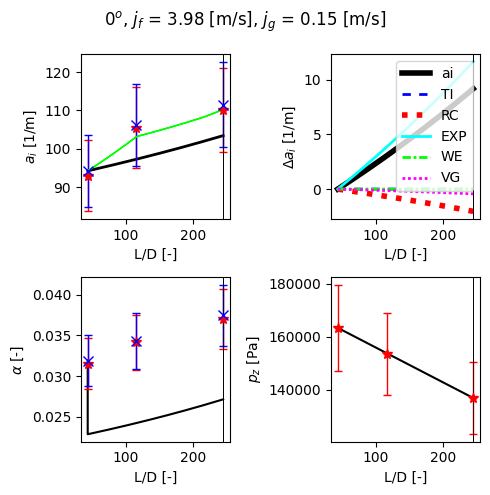

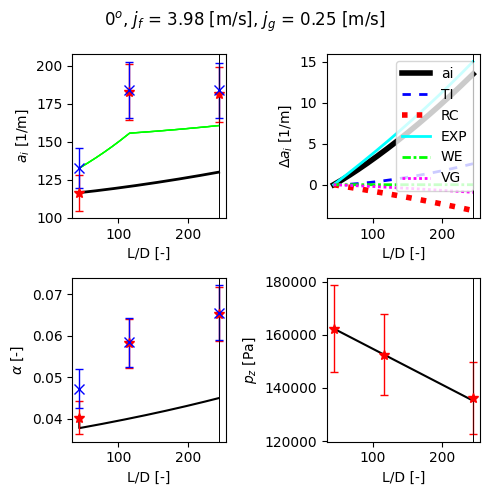

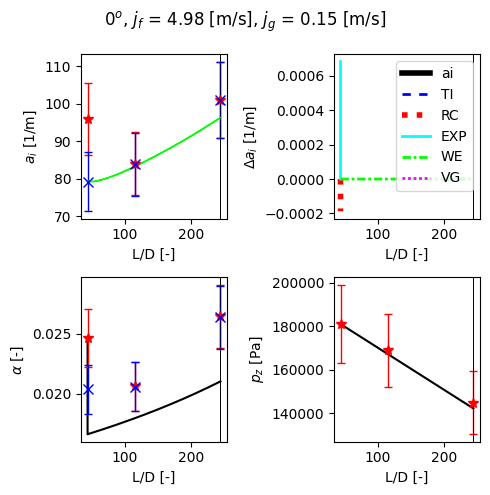

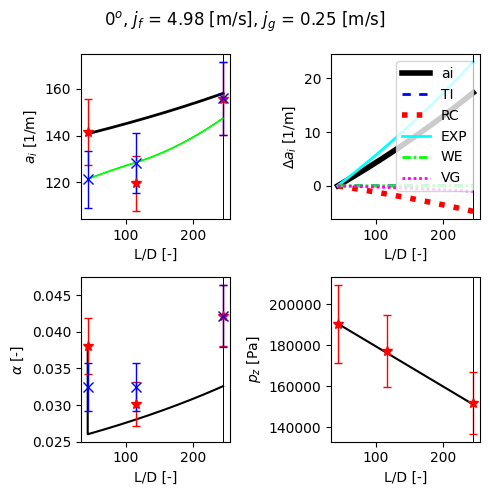

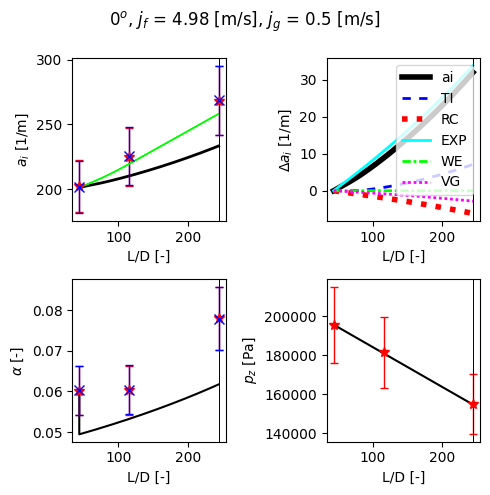

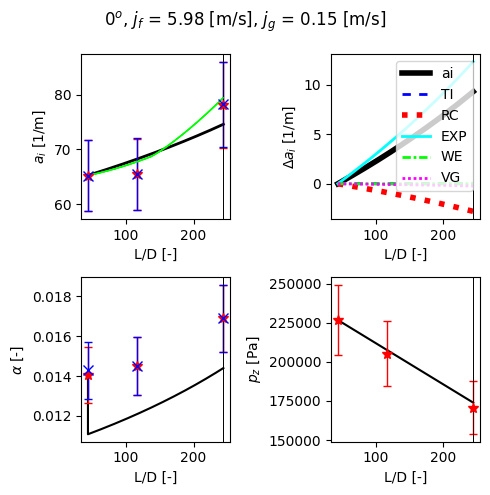

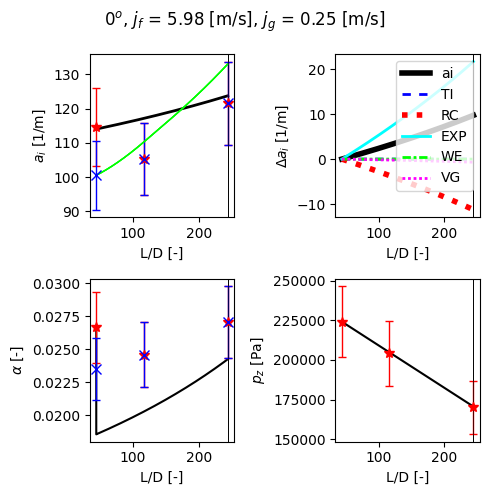

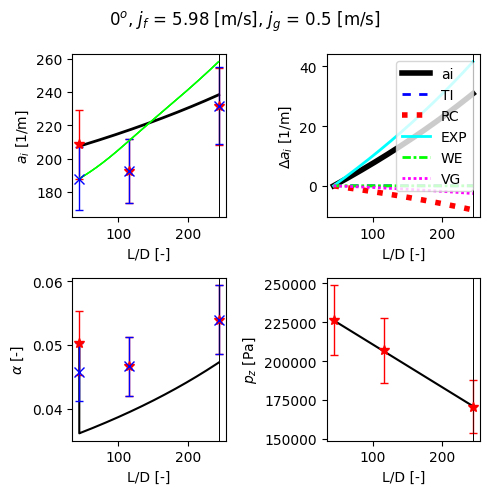

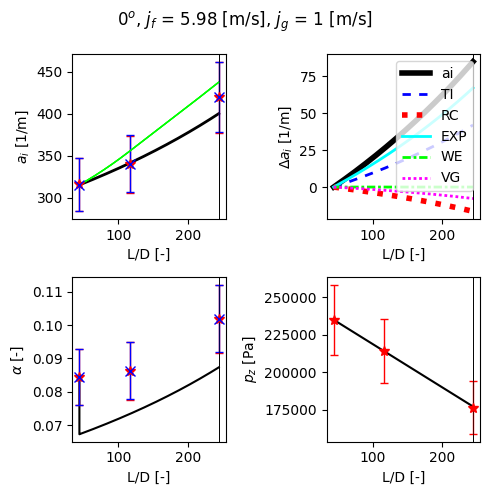

In [6]:
for i, cond in enumerate(database):
    cond:mg.Condition

    print(cond)

    if True: # cond.jf == 3.98 and cond.jgref <= 0.15:
        cond.mirror(sym90=True)

        # Plot indexing
        p_idx = int(np.where((umap == cmap[i]).all(axis=1))[0].item())
        plt.figure(p_idx,figsize=(5,5))
        plt.suptitle("${}^o$, $j_f$ = {} [m/s], $j_g$ = {} [m/s]".format(int(cond.theta),cond.jf,cond.jgref))
        
        ai_st = 0
        if cond.LoverD == sp:
            for ii, cp in enumerate(endpoints):

                dpdz_method     = 'LM'
                LM_C            = 25
                k_m             = None

                if ii == 0:
                    io = mg.iate_1d_1g(
                        cond, query = cp, z_step = z_step, We_cr = 5, 
                        C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], debug = debug, preset = preset
                        )
                
                    label_ai = 'ai'
                    label_ti = 'TI'
                    label_rc = 'RC'
                    label_exp = 'EXP'
                    label_we = 'WE'
                    label_vg = 'VG'
                else:
                    io = mg.iate_1d_1g(
                        cond, query = cp, z_step = z_step, io = io, We_cr = 5, 
                        C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], debug = debug, preset = preset
                        )
                    
                    label_ai = None
                    label_ti = None
                    label_rc = None
                    label_exp = None
                    label_we = None
                    label_vg = None
                
                z_mesh  = io["z_mesh"]
                ai      = io["ai"]
                aiti    = io["aiti"]
                airc    = io["airc"]
                aiexp   = io["aiexp"]
                aiwe    = io["aiwe"]
                aivg    = io["aivg"]
                alpha   = io["alpha"]
                pz      = io["pz"]

                z_mesh = z_mesh / cond.Dh

                if multiplot:
                    plt.figure(p_idx)
                    plt.subplot(221)
                    plt.plot(z_mesh,ai,'k',linewidth=2)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    plt.figure(p_idx)
                    plt.subplot(222)
                    plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    plt.legend(loc='upper right')
                    plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')
                    # plt.ylim(bottom = -10, top = 60)

                    plt.figure(p_idx)
                    plt.subplot(223)
                    plt.plot(z_mesh,alpha,'k')
                    plt.ylabel(r'$\alpha$ [-]')
                    plt.xlabel('L/D [-]')

                    plt.figure(p_idx)
                    plt.subplot(224)
                    plt.plot(z_mesh,pz,'k')
                    plt.ylabel('$p_{z}$ [Pa]')
                    plt.xlabel('L/D [-]')
                    
                else:
                    plt.figure(p_idx)
                    plt.plot(z_mesh,ai,'k',linewidth=4)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    # plt.figure(p_idx)
                    # plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    # plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    # plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    # plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    # plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    # plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    # plt.legend(loc='upper right')
                    # plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    # plt.xlabel('L/D [-]')
                    # plt.xlim(left = 20, right = 120)
                    # plt.ylim(bottom = -10, top = 60)

                ai_st = ai_st + ai[-1] - ai[0]

        perr = 0.1

        if multiplot:
            plt.figure(p_idx)
            plt.subplot(221)
            plt.errorbar(cond.LoverD,cond.area_avg('ai'),cond.area_avg('ai')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

            if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                plt.figure(p_idx)
                plt.subplot(221)
                plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

            plt.figure(p_idx)
            plt.subplot(222)

            plt.figure(p_idx)
            plt.subplot(223)
            plt.errorbar(cond.LoverD,cond.area_avg('alpha'),cond.area_avg('alpha')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

            if xl_compare == True and cond.area_avg_void_sheet != '#REF!':
                plt.figure(p_idx)
                plt.subplot(223)
                plt.errorbar(cond.LoverD,cond.area_avg_void_sheet,cond.area_avg_void_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3)

            p = (cond.jgatm * 101325 / cond.jgloc)

            plt.figure(p_idx)
            plt.subplot(224)
            plt.errorbar(cond.LoverD,p,p*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

            for iii, cp in enumerate(endpoints):
                plt.figure(p_idx)

                plt.subplot(221)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.subplot(222)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.subplot(223)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.subplot(224)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

            plt.tight_layout()
        
        else:
            plt.figure(p_idx)
            plt.errorbar(cond.LoverD,cond.area_avg('ai'),cond.area_avg('ai')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

            if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                plt.figure(p_idx)
                plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

            for iii, cp in enumerate(endpoints):
                plt.figure(p_idx)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

            plt.tight_layout()

        #######################################################################################################################################################################
        #######################################################################################################################################################################
        #######################################################################################################################################################################
        #######################################################################################################################################################################
        # Compare against Excel standard
        if True:
            wb = op.load_workbook(filename="H:\TRSL-H\IATE\Legacy\Talley_Suite\H\standard_talley.xlsx", data_only=True)

            ws = wb['z']

            talley_z = []
            for row in ws.iter_rows(min_row=1,max_row=1,values_only=True):
                for value in row:
                    talley_z.append(value)

            ws = wb['ai']
            talley_ai_run1 = []
            talley_ai_run2 = []
            talley_ai_run3 = []
            talley_ai_run4 = []
            talley_ai_run5 = []
            talley_ai_run6 = []
            talley_ai_run7 = []
            talley_ai_run8 = []
            talley_ai_run9 = []

            for row in ws.iter_rows(min_row=1,max_row=1,values_only=True):
                for value in row:
                    talley_ai_run1.append(value)
            for row in ws.iter_rows(min_row=2,max_row=2,values_only=True):
                for value in row:
                    talley_ai_run2.append(value)
            for row in ws.iter_rows(min_row=3,max_row=3,values_only=True):
                for value in row:
                    talley_ai_run3.append(value)
            for row in ws.iter_rows(min_row=4,max_row=4,values_only=True):
                for value in row:
                    talley_ai_run4.append(value)
            for row in ws.iter_rows(min_row=5,max_row=5,values_only=True):
                for value in row:
                    talley_ai_run5.append(value)
            for row in ws.iter_rows(min_row=6,max_row=6,values_only=True):
                for value in row:
                    talley_ai_run6.append(value)
            for row in ws.iter_rows(min_row=7,max_row=7,values_only=True):
                for value in row:
                    talley_ai_run7.append(value)
            for row in ws.iter_rows(min_row=8,max_row=8,values_only=True):
                for value in row:
                    talley_ai_run8.append(value)
            for row in ws.iter_rows(min_row=9,max_row=9,values_only=True):
                for value in row:
                    talley_ai_run9.append(value)

            plt.figure(p_idx)

            ls = '-' #'dotted'#(0,(3,5))
            lw = 1
            lc = 'lime'

            if multiplot:
                plt.subplot(221)

            if cond.jf == 3.98 and cond.jgatm == 0.15:
                plt.plot(talley_z,talley_ai_run1,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 300)
            elif cond.jf == 3.98 and cond.jgref == 0.25:
                plt.plot(talley_z,talley_ai_run2,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 200)
            elif cond.jf == 4.98 and cond.jgref == 0.15:
                plt.plot(talley_z,talley_ai_run3,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 200)
            elif cond.jf == 4.98 and cond.jgref == 0.25:
                plt.plot(talley_z,talley_ai_run4,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 300)
            elif cond.jf == 4.98 and cond.jgref == 0.50:
                plt.plot(talley_z,talley_ai_run5,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 200)
            elif cond.jf == 5.98 and cond.jgref == 0.15:
                plt.plot(talley_z,talley_ai_run6,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 600)
            elif cond.jf == 5.98 and cond.jgref == 0.25:
                plt.plot(talley_z,talley_ai_run7,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 300)
            elif cond.jf == 5.98 and cond.jgref == 0.50:
                plt.plot(talley_z,talley_ai_run8,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 400)
            elif cond.jf == 5.98 and cond.jgref == 1.00:
                plt.plot(talley_z,talley_ai_run9,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 400)

In [7]:
for cond in database:
    cond:mg.Condition

    if cond.jf == 3.98 and cond.jgref <= 0.15 and cond.LoverD == 44:
        print(cond)
        cond.mirror(sym90=True)

        # cond.calc_COV_RC(reconstruct_flag = True)
        # cond.calc_COV_TI(reconstruct_flag = True)

        cond.pretty_print()

jf=3.98_jgloc=0.09_theta=0.0_port=44D_Talley
jf = 3.98	jg = 0.15	theta = 0.0	44D	Talley
90
	1.0
		 {'roverR': 0, 'time': 0, 'frequency': 0, 'num_spherical': 0, 'num_distorted': 0, 'num_cap': 0, 'num_slug': 0, 'num_G1': 0, 'num_G2': 0, 'num_total': 0, 'obs_0': 0, 'obs_1': 0, 'obs_2': 0, 'obs_3': 0, 'bub_freq': 0, 'pair_spherical': 0, 'pair_distorted': 0, 'pair_cap': 0, 'pair_slug': 0, 'total_paired': 0, 'percent_paired': 0, 'alpha_spherical': 0, 'alpha_distorted': 0, 'alpha_cap': 0, 'alpha_slug': 0, 'alpha_G1': 0, 'alpha_G2': 0, 'alpha': 0, 'ai_spherical': 0, 'ai_distorted': 0, 'ai_cap': 0, 'ai_slug': 0, 'ai_G1': 0, 'ai_G2': 0, 'ai': 0, 'Dsm1': 0, 'Lcl1': 0, 'Dsm2': 0, 'Lcl2': 0, 'ug1': 0, 'ug2': 0, 'sigma_ug1': 0, 'sigma_ug2': 0, 'fluctuation': 0, 'alpha_ug1': 0, 'alpha_ug2': 0, 'alpha_ug': 0, 'alpha_Dsm1': 0, 'alpha_Dsm2': 0, 'r01': 0, 'r02': 0, 'r03': 0, 'r12': 0, 'r13': 0, 'r23': 0, 'vf': 0, 'jf_loc': 0, 'jf': 0, 'delta_p': 0, 'sigma_delta_p': 0, 'vr': 0, 'COV_RC_loc': 0.0, 'COV_TI_

In [8]:
# for cond in database:
#     cond:mg.Condition

#     print(cond)
#     cond.mirror(sym90=True)

#     cond.calc_COV_RC(reconstruct_flag = True)
#     cond.calc_COV_TI(reconstruct_flag = True)

#     if cond.LoverD == 244:
#         print(f"error: {cond.calc_errors('alpha','alpha_reconstructed')}")
#         cond.plot_contour(param = 'alpha', num_levels = 100, colormap = 'jet', cartesian = False)
#         cond.plot_contour(param = 'alpha_reconstructed', num_levels = 100, colormap = 'jet', cartesian = False)
#         cond.plot_profiles2(param = 'alpha_reconstructed')

In [9]:
'''
if method == 'legacy':
            # We have to integrate twice, once with resepect to r, again with respect to phi
            # Start with r

            I = 0
            param_r = [] # array for parameter integrated wrt r
            angles = []
            
            if not self.mirrored:
                warnings.warn("Mirroring in area-avg")
                self.mirror()

            for angle, r_dict in self.data.items():

                rs_temp = []
                vars_temp = []
                angles.append(angle * np.pi/180) # Convert degrees to radians
                for rstar, midas_dict in r_dict.items():
                    if rstar >= 0: # This should be unnecessary now with the new mirror, but it's not hurting anyone by being here
                        try:
                            rs_temp.append( rstar ) # This is proably equivalent to rs = list(r_dict.keys() ), but I'm paranoid about ordering
                            vars_temp.append( float( midas_dict[param] * rstar)) # Floatify to avoid np inhomogeneous array issues
                        except:
                            if debug: print('Problem with:', angle, r_dict, param)
                        #if debug: print(angle, midas_dict, file=debugFID)
                
                
                vars = [var for _, var in sorted(zip(rs_temp, vars_temp))]
                rs = sorted(rs_temp)

                if debug: print("Arrays to integrate", angle, rs, vars, file=debugFID)

                if len(rs) != len(vars):
                    ValueError( f"rs to integrate over {rs} must be the same length as params {vars}, occured at {angle}" )
                    
                try:
                    param_r.append( integrate.simpson(vars, rs, even=even_opt) ) # Integrate wrt r

                    print(f"1.0: {r_dict[1.0]}\t0.95: {r_dict[0.95]}\t0.9: {r_dict[0.9]}\t0.0: {r_dict[0.0]}")

                    #param_line
                    #param_area
                    # Rows 6-22

                    if 0.95 in r_dict:
                        S_1 = 0.05 * sum(1 * 0,
                                4 * 0.95 * r_dict[0.95],
                                2 * 0.90 * r_dict[0.95],
                                4 * 0.85 * r_dict[0.95],
                                1 * 0.80 * r_dict[0.95],
                                ) / 3
                        
                        S_2 = 0.10 * sum(1 * 0.80 * r_dict[0.8],
                                4 * 0.70 * r_dict[0.95],
                                2 * 0.60 * r_dict[0.95],
                                4 * 0.50 * r_dict[0.95],
                                1 * 0.40 * r_dict[0.95],
                                ) / 3
                        
                        S_3 = 0.05 * sum(1 * 0,
                                4 * 0.95 * r_dict[0.95],
                                2 * 0.90 * r_dict[0.95],
                                4 * 0.85 * r_dict[0.95],
                                1 * 0.80 * r_dict[0.95],
                                ) / 3
                        pass

                    # (0.1/3) * (
                    # 0 + 
                    # 4 * (0.9*ABS($A$22) + 0.7*ABS($A$20) + 0.5*ABS($A$18)) + 
                    # 2 * (0.8*ABS($A$21) + 0.6*ABS($A$19)) + 
                    # 0.4*ABS($A$17)) + 
                    # 
                    # (0.2/3) * (
                    # -0.4*ABS($A$17) + 
                    # 4 * (-0.2*ABS($A$16) + 0.2*$A$14) + 
                    # 2 * (0.0*$A$15) + 
                    # 0.4*$A$13) + 
                    # 
                    # (0.1/3) * (
                    # 0.4*$A$13 + 
                    # 4 * (0.5*$A$12 + 0.7*$A$10) + 
                    # 2 * (0.6*$A$11) + 
                    # 0.8*$A$9) + 
                    # 
                    # (0.05/3) * (
                    # 0.8*$A$9 + 
                    # 4 * (0.85*$A$8 + 0.95*$A$6) + 
                    # 2 * (0.9*$A$7) + 
                    # 0
                    # )

                except Exception as e:
                    print(e)
                    print(rs, vars)
                if debug: print("calculated integral:", integrate.simpson(vars, rs, even=even_opt), file=debugFID)
                    #I = 2 * np.pi
            if debug: print("Integrated wrt r", param_r, file=debugFID)

            param_r = [param for _, param in sorted(zip(angles, param_r))]
            angles = sorted(angles)

            I = integrate.simpson(param_r, angles, even=even_opt) / np.pi # Integrate wrt theta, divide by normalized area
            self.area_avgs.update({param: I})
'''

'\nif method == \'legacy\':\n            # We have to integrate twice, once with resepect to r, again with respect to phi\n            # Start with r\n\n            I = 0\n            param_r = [] # array for parameter integrated wrt r\n            angles = []\n            \n            if not self.mirrored:\n                warnings.warn("Mirroring in area-avg")\n                self.mirror()\n\n            for angle, r_dict in self.data.items():\n\n                rs_temp = []\n                vars_temp = []\n                angles.append(angle * np.pi/180) # Convert degrees to radians\n                for rstar, midas_dict in r_dict.items():\n                    if rstar >= 0: # This should be unnecessary now with the new mirror, but it\'s not hurting anyone by being here\n                        try:\n                            rs_temp.append( rstar ) # This is proably equivalent to rs = list(r_dict.keys() ), but I\'m paranoid about ordering\n                            vars_temp.